<a href="https://colab.research.google.com/github/FlexTaco/cs370/blob/main/assignments/assignment-1/011_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Development Environment Setup


In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

## Simulation of Multivariate Normal Distribution


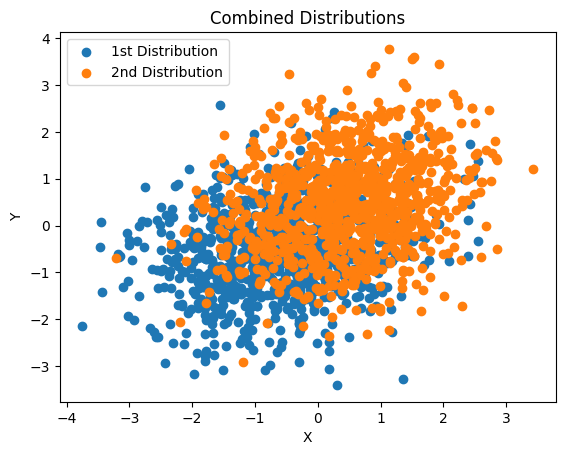

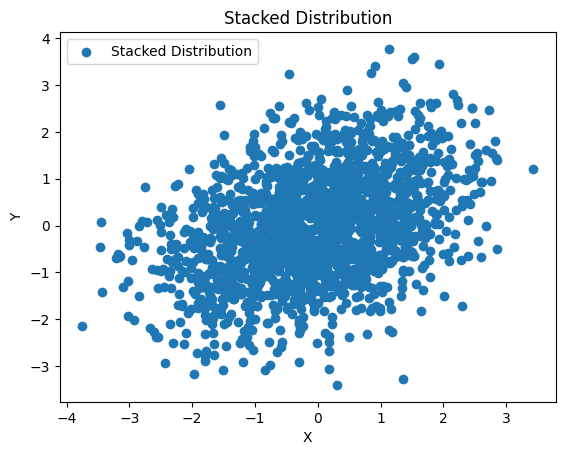

In [13]:
import torch
import matplotlib.pyplot as plt

µ = torch.tensor([-0.5, -0.5])
cov = torch.tensor([[1, 0.25], [0.25, 1]])

µ2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

firstSample = torch.distributions.MultivariateNormal(µ, cov).sample((1000,))
secondSample = torch.distributions.MultivariateNormal(µ2, cov2).sample((1000,))

plt.scatter(firstSample[:, 0], firstSample[:, 1], label='1st Distribution')
plt.scatter(secondSample[:, 0], secondSample[:, 1], label='2nd Distribution')
plt.title('Combined Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

stacked_samples = torch.cat((firstSample, secondSample))

plt.scatter(stacked_samples[:, 0], stacked_samples[:, 1], label='Stacked Distribution')
plt.title('Stacked Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## K-Means Clustering


## Projection with Principal Components Analysis (PCA)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA

#generate some data
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

#each feature will have zero mean
X = X - np.mean(X, axis=0)
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i], X[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

#initialize
pca = PCA(n_components=4)

#fit
pca.fit(X)

#get principal components
principal_compsbuiltin = pca.components.T

#print each principal component
for i,component in enumerate(pca.components_):
    print(f'principal component {i}')
    print(component)
    print()

#compute covariance matrix
#https://www.youtube.com/watch?v=F-aku75OpoM
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100
#eigenvalues and eigenvectors of covariance matrix
eigvecs = np.linalg.eig(cov_matrix)
#sort order by magnitude of eigenvalue
ordering = np.argsort(eigvecs[0])[::-1]
#get eigenvectors
principal_comps_byhand = eigvecs[1][:,ordering]
#our by-hand eigenvectors
print(principal_comps_byhand)
print()
#results from built-in call
print(principal_comps_builtin)